# Test GEModelTools - HANK model with Capital

**Table of contents**<a id='toc0_'></a>    
- 1. [Stationary equilibrium](#toc1_)    
  - 1.1. [Distributions](#toc1_1_)    
  - 1.2. [MPCs](#toc1_2_)    
- 2. [Compute Jacobians](#toc2_)    
- 3. [Fiscal policy shock](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from HANKCapitalModel import HANKCapitalModelClass

## 1. <a id='toc1_'></a>[Stationary equilibrium](#toc0_)

In [2]:
model = HANKCapitalModelClass(name='baseline')

In [3]:
par = model.par
ss = model.ss
path = model.path
sim = model.sim

In [4]:
par.beta_mean = 0.985
model.find_ss(do_print=True)

find beta for market clearing
 beta =   0.985000000000 -> ss.clearing_A = -16.399829586868 [5.3 secs]
 beta =   0.985000000000 -> ss.clearing_A = -16.399829586868 [0.7 secs]
 beta =   0.985000000000 -> ss.clearing_A = -16.399829586868 [0.6 secs]
 beta =   0.985000014678 -> ss.clearing_A = -16.399790886103 [0.6 secs]
 beta =   0.991219795737 -> ss.clearing_A = 980.330899328417 [0.9 secs]
 beta =   0.985102338161 -> ss.clearing_A = -16.120800744925 [0.7 secs]
 beta =   0.985102352841 -> ss.clearing_A = -16.120759351672 [0.8 secs]
 beta =   0.985150183841 -> ss.clearing_A = -15.983713990569 [0.7 secs]
 beta =   0.985245875199 -> ss.clearing_A = -15.695800345452 [0.7 secs]
 beta =   0.985437257916 -> ss.clearing_A = -15.057910386550 [0.7 secs]
 beta =   0.985820023350 -> ss.clearing_A = -13.459789514717 [0.8 secs]
 beta =   0.986585554218 -> ss.clearing_A =  -7.785196831651 [1.3 secs]
 beta =   0.987635816116 -> ss.clearing_A =  39.953006762621 [6.2 secs]
 beta =   0.986756832041 -> ss.cle

note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 0.3 secs
household problem simulated along transition in 1.7 secs



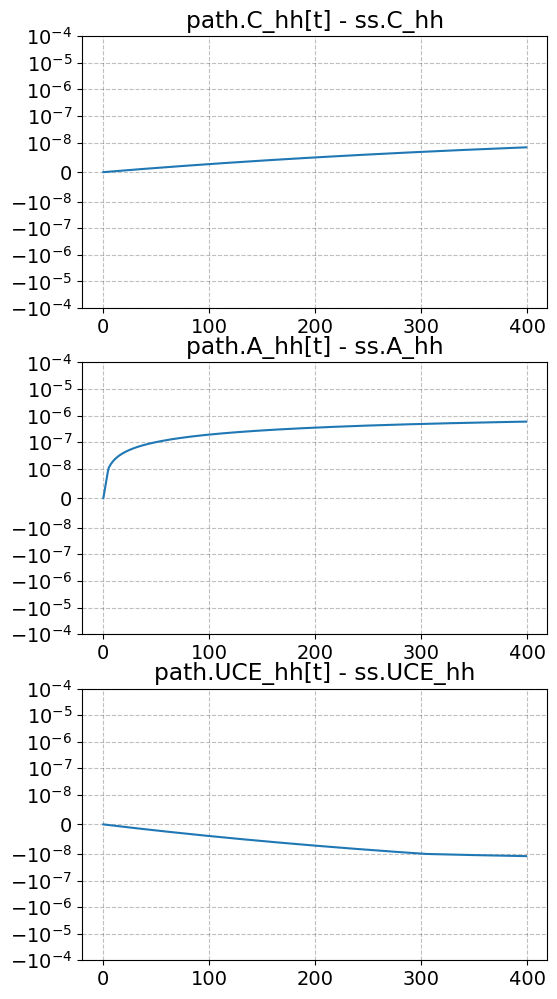

In [5]:
model.test_hh_path()

In [6]:
model.test_path()

note: inputs = steady state value -> expected: no difference to steady state and zero errors

difference to value at steady state:
A              : t0 =  0.0e+00, max abs.  0.0e+00
B              : t0 =  0.0e+00, max abs.  0.0e+00
clearing_A     : t0 =  3.6e-15, max abs.  5.9e-07
clearing_Y     : t0 =  4.2e-15, max abs.  8.4e-09
Div_int        : t0 =  0.0e+00, max abs.  0.0e+00
Div_k          : t0 =  0.0e+00, max abs.  0.0e+00
Div            : t0 =  0.0e+00, max abs.  0.0e+00
eg             : t0 =  0.0e+00, max abs.  0.0e+00
em             : t0 =  0.0e+00, max abs.  0.0e+00
G              : t0 =  0.0e+00, max abs.  0.0e+00
i              : t0 =  0.0e+00, max abs.  0.0e+00
I              : t0 =  0.0e+00, max abs.  0.0e+00
Ip             : t0 =  0.0e+00, max abs.  0.0e+00
K              : t0 =  0.0e+00, max abs.  0.0e+00
N              : t0 =  0.0e+00, max abs.  0.0e+00
p_eq           : t0 =  0.0e+00, max abs.  0.0e+00
p_int          : t0 =  0.0e+00, max abs.  0.0e+00
p_k            : t0

### 1.1. <a id='toc1_1_'></a>[Distributions](#toc0_)

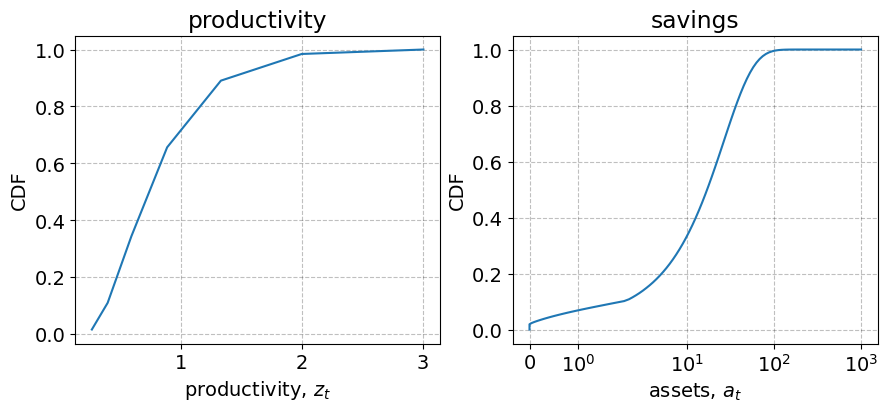

In [7]:
fig = plt.figure(figsize=(16,4),dpi=100)

# a. income
ax = fig.add_subplot(1,3,1)
ax.set_title('productivity')
ax.plot(par.z_grid,np.cumsum(np.sum(ss.D,axis=(0,2))))

ax.set_xlabel('productivity, $z_{t}$')
ax.set_ylabel('CDF')

# b. liquid assets
ax = fig.add_subplot(1,3,2)
ax.set_title('savings')
ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),np.insert(np.cumsum(np.sum(ss.D,axis=(0,1))),0,0.0),label='discrete')
ax.set_xlabel('assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')

### 1.2. <a id='toc1_2_'></a>[MPCs](#toc0_)

In [8]:
MPC = np.zeros(ss.D.shape)
dc = (ss.c[:, :, 1:] - ss.c[:, :, :-1])
dm = ss.ra*par.a_grid[1:]
MPC[:, :, :-1] = dc / dm
MPC[:, :, -1] = MPC[:, :, -2]  # assuming constant MPC at end
mean_MPC = np.sum(MPC*ss.D)
mean_MPC_ann = 1-(1-mean_MPC) ** 4
print(f'mean MPC: {mean_MPC:.3f} [annual: {mean_MPC_ann:.3f}]')

mean MPC: 0.603 [annual: 0.975]


## 2. <a id='toc2_'></a>[Compute Jacobians](#toc0_)

In [9]:
model.compute_jacs(do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for Z               in 0.3 secs
curly_Y and curly_D calculated for ra              in 0.2 secs
curly_E calculated in 2.1 secs
builiding blocks combined in 0.0 secs
household Jacobian computed in 2.6 secs

full Jacobians:
full Jacobian to unknowns computed in 23.6 secs [in evaluate_path(): 22.4 secs]
full Jacobian to shocks computed in 3.2 secs [in evaluate_path(): 2.8 secs]


## 3. <a id='toc3_'></a>[Fiscal policy shock](#toc0_)

In [10]:
model.find_transition_path(do_print=True,do_end_check=False)

finding the transition path:
 it =   0 -> max. abs. error = 1.30e-03
   0.00e+00 in fisher_res
   0.00e+00 in w_res
   1.30e-03 in clearing_Y
   0.00e+00 in invest_res
   0.00e+00 in valuation_res
   0.00e+00 in NKPC_res
   3.26e-05 in NKPC_w_res
 it =   1 -> max. abs. error = 1.34e-05
   3.43e-10 in fisher_res
   2.67e-07 in w_res
   1.11e-06 in clearing_Y
   1.34e-05 in invest_res
   1.18e-08 in valuation_res
   2.87e-18 in NKPC_res
   5.33e-08 in NKPC_w_res
 it =   2 -> max. abs. error = 5.93e-07
   8.45e-12 in fisher_res
   9.95e-11 in w_res
   5.07e-08 in clearing_Y
   5.93e-07 in invest_res
   1.71e-10 in valuation_res
   5.62e-19 in NKPC_res
   1.35e-09 in NKPC_w_res
 it =   3 -> max. abs. error = 9.76e-09
   9.41e-14 in fisher_res
   3.07e-11 in w_res
   8.90e-10 in clearing_Y
   9.76e-09 in invest_res
   2.36e-12 in valuation_res
   7.17e-19 in NKPC_res
   2.94e-12 in NKPC_w_res
 it =   4 -> max. abs. error = 1.05e-09
   3.11e-15 in fisher_res
   8.41e-13 in w_res
   3.09e-11 

### shocks ###


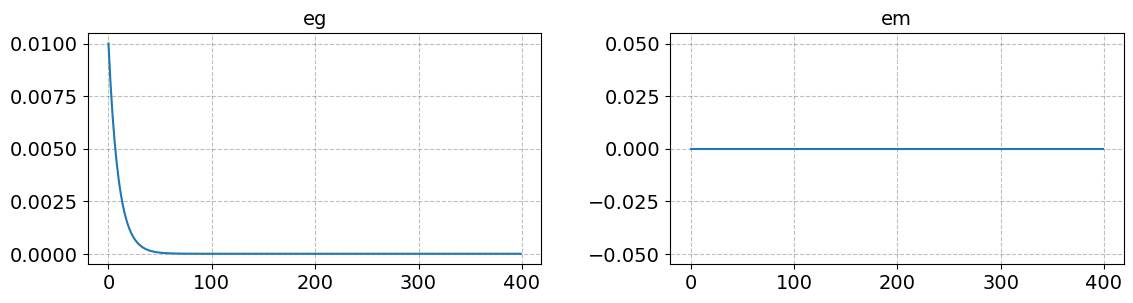


### varnames ###


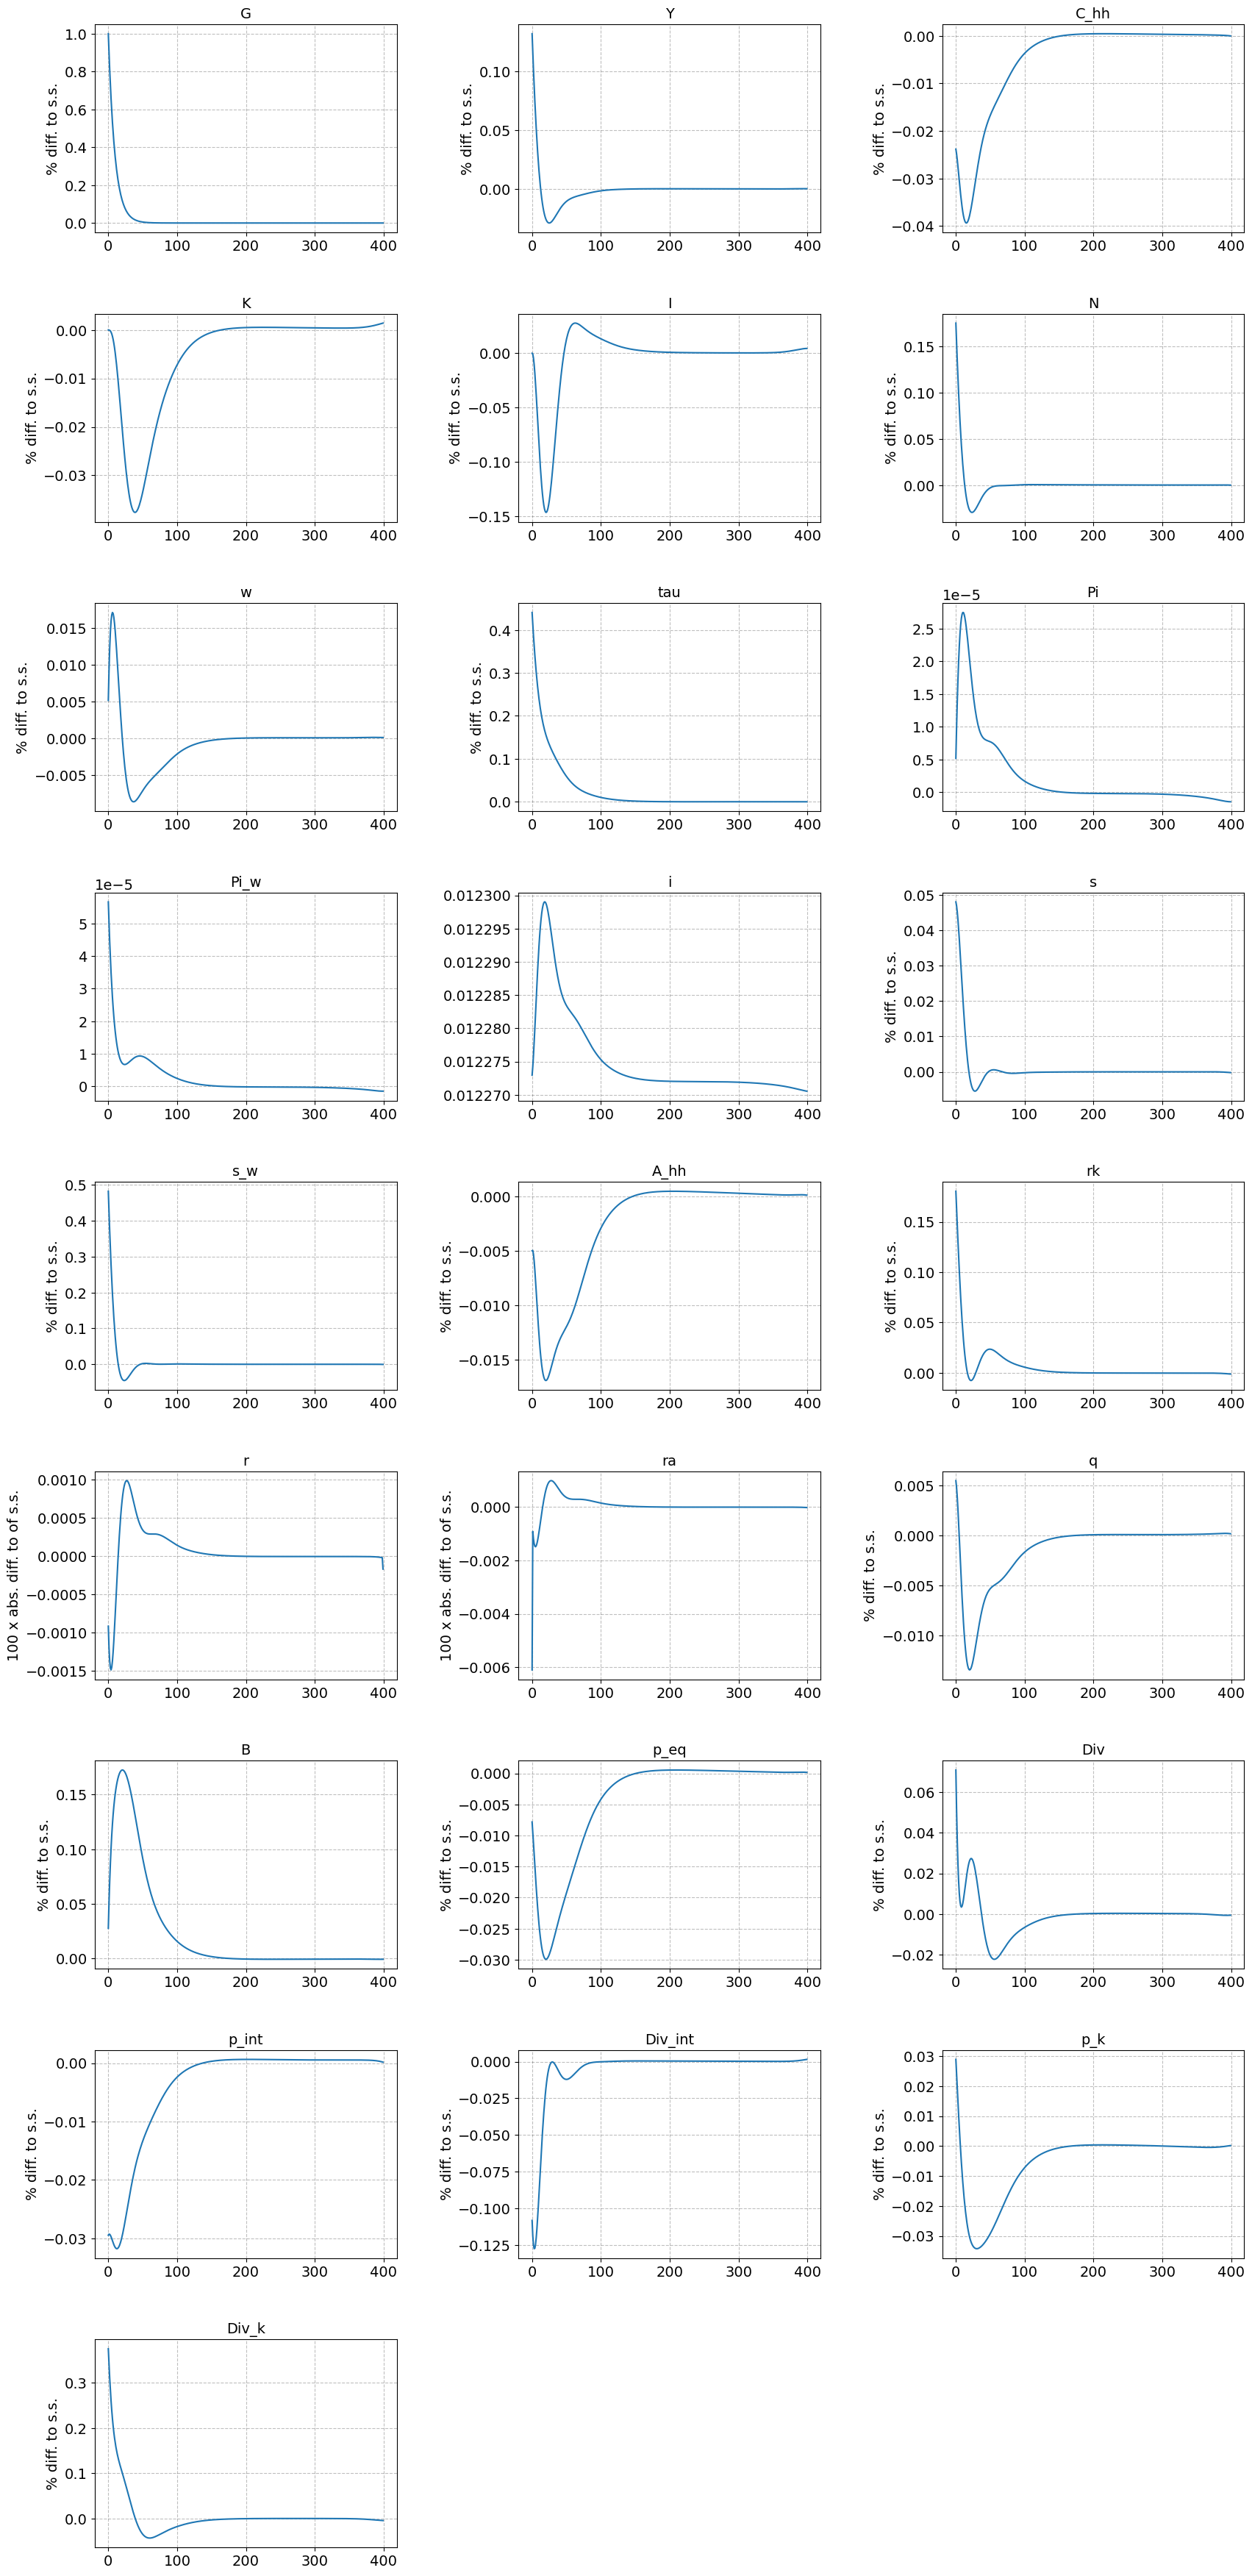


### tagets ###


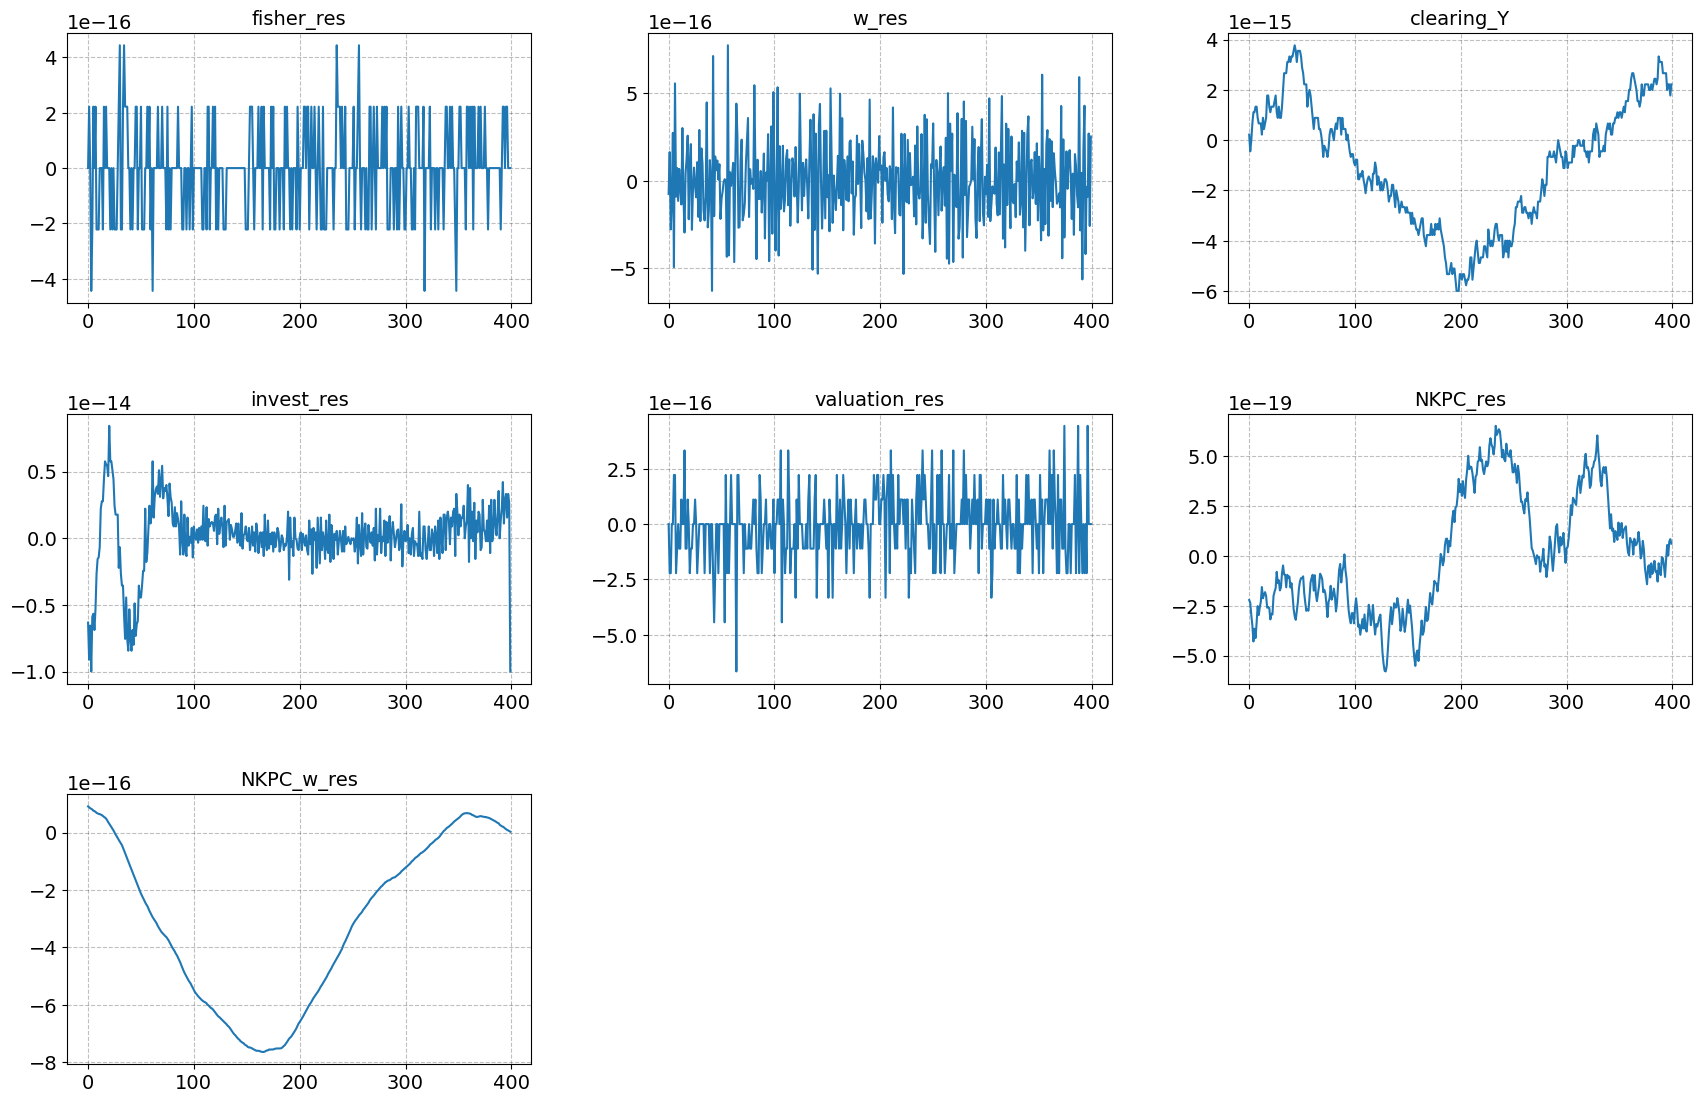

In [11]:
paths = ['G', 'Y', 'C_hh', 'K', 'I',
         'N', 'w', 'tau', 'Pi', 'Pi_w', 'i', 's', 's_w',
         'A_hh',
         'rk', 'r','ra',
         'q', 'B',
         'p_eq', 'Div', 'p_int', 'Div_int', 'p_k', 'Div_k']
paths_short = ['Y', 'C_hh', 'K', 'I', 'N', 'w']
lvl_value = ['eg', 'em', 'i', 'Pi', 'Pi_w']
abs_diff = ['r', 'ra', 'rl', 'i']
facs = {'r':100,'ra':100,'rl':100}
# model.show_IRFs(paths,abs_diff=abs_diff,facs=facs,ncols=3,T_max=100)
model.show_IRFs(paths, lvl_value=lvl_value, abs_diff=abs_diff, facs=facs,ncols=3, do_shocks=True)